In [1]:
import numpy as np
import pandas as pd
import urllib
import matplotlib.pyplot as plt
import geopandas as gpd
import matplotlib.image as mpimg
%matplotlib inline
import seaborn as sns
from shapely.geometry import Point
import warnings


warnings.filterwarnings('ignore')

In [2]:
airbnb = pd.read_csv("Airbnb_NYC_2023_11.csv")
airbnb.head()

,id,name,host_id,host_name,neighbourhood_group,neighbourhood,latitude,longitude,room_type,price,minimum_nights,number_of_reviews,last_review,reviews_per_month,calculated_host_listings_count,availability_365,number_of_reviews_ltm,license
0,2595,Rental unit in New York · ★4.68 · Studio · 1 b...,2845,Jennifer,Manhattan,Midtown,40.75356,-73.98559,Entire home/apt,240,30,49,2022-06-21,0.29,3,365,0,NaN
1,5121,Rental unit in Brooklyn · ★4.52 · 1 bedroom · ...,7356,Garon,Brooklyn,Bedford-Stuyvesant,40.68535,-73.95512,Private room,66,30,50,2019-12-02,0.28,2,120,0,NaN
2,9357,Rental unit in New York · ★4.52 · Studio · 1 b...,30193,Tommi,Manhattan,Hell's Kitchen,40.76724,-73.98664,Entire home/apt,175,45,58,2017-08-13,0.34,1,340,0,NaN
3,6848,Rental unit in Brooklyn · ★4.58 · 2 bedrooms ·...,15991,Allen & Irina,Brooklyn,Williamsburg,40.70935,-73.95342,Entire home/apt,81,30,191,2023-08-14,1.09,1,110,5,NaN
4,10452,Rental unit in Brooklyn · ★4.65 · 1 bedroom · ...,35935,Angela,Brooklyn,Bedford-Stuyvesant,40.68294,-73.95682,Private room,90,30,80,2023-09-16,0.49,4,290,2,NaN


In [3]:
len(airbnb)

39160

In [4]:
airbnb.dtypes

id                                  int64
name                               object
host_id                             int64
host_name                          object
neighbourhood_group                object
neighbourhood                      object
latitude                          float64
longitude                         float64
room_type                          object
price                               int64
minimum_nights                      int64
number_of_reviews                   int64
last_review                        object
reviews_per_month                 float64
calculated_host_listings_count      int64
availability_365                    int64
number_of_reviews_ltm               int64
license                            object
dtype: object

### 1 - Understand and clean data

In [5]:
airbnb.isnull().sum()

id                                    0
name                                  0
host_id                               0
host_name                             5
neighbourhood_group                   0
neighbourhood                         0
latitude                              0
longitude                             0
room_type                             0
price                                 0
minimum_nights                        0
number_of_reviews                     0
last_review                       10949
reviews_per_month                 10949
calculated_host_listings_count        0
availability_365                      0
number_of_reviews_ltm                 0
license                           35281
dtype: int64

In [6]:
airbnb.drop(['id', 'name', 'host_name', 'last_review', 'license'], axis=1, inplace=True)
airbnb.head()

,host_id,neighbourhood_group,neighbourhood,latitude,longitude,room_type,price,minimum_nights,number_of_reviews,reviews_per_month,calculated_host_listings_count,availability_365,number_of_reviews_ltm
0,2845,Manhattan,Midtown,40.75356,-73.98559,Entire home/apt,240,30,49,0.29,3,365,0
1,7356,Brooklyn,Bedford-Stuyvesant,40.68535,-73.95512,Private room,66,30,50,0.28,2,120,0
2,30193,Manhattan,Hell's Kitchen,40.76724,-73.98664,Entire home/apt,175,45,58,0.34,1,340,0
3,15991,Brooklyn,Williamsburg,40.70935,-73.95342,Entire home/apt,81,30,191,1.09,1,110,5
4,35935,Brooklyn,Bedford-Stuyvesant,40.68294,-73.95682,Private room,90,30,80,0.49,4,290,2


In [7]:
airbnb.fillna({'reviews_per_month': 0}, inplace=True)

airbnb.reviews_per_month.isnull().sum()

0

In [8]:
airbnb.neighbourhood_group.unique()

array(['Manhattan', 'Brooklyn', 'Queens', 'Bronx', 'Staten Island'],
      dtype=object)

In [9]:
len(airbnb.neighbourhood.unique())

223

In [10]:
airbnb.describe()

,host_id,latitude,longitude,price,minimum_nights,number_of_reviews,reviews_per_month,calculated_host_listings_count,availability_365,number_of_reviews_ltm
count,3.916000e+04,39160.000000,39160.000000,39160.000000,39160.000000,39160.000000,39160.000000,39160.000000,39160.000000,39160.000000
mean,1.575643e+08,40.729372,-73.945897,205.995480,30.272165,25.584397,0.770732,39.493105,153.915628,6.735674
std,1.693066e+08,0.056645,0.054958,466.662167,26.534306,57.488642,1.545545,117.040976,144.305706,17.023977
min,1.678000e+03,40.500314,-74.251907,0.000000,1.000000,0.000000,0.000000,1.000000,0.000000,0.000000
25%,1.654341e+07,40.688880,-73.982819,76.000000,30.000000,0.000000,0.000000,1.000000,0.000000,0.000000
50%,7.831966e+07,40.726470,-73.953960,130.000000,30.000000,4.000000,0.160000,1.000000,130.000000,0.000000
75%,2.783108e+08,40.762632,-73.926260,220.000000,30.000000,23.000000,0.930000,6.000000,309.000000,5.000000
max,5.442621e+08,40.911380,-73.713650,30000.000000,1250.000000,1854.000000,73.720000,647.000000,365.000000,900.000000


## add zipcode

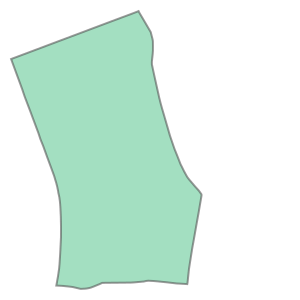

In [11]:
zipcode = gpd.read_file('./ZIPCODE/ZIP_CODE_040114.shp')
zipcode['geometry'][0]

In [12]:
airbnb_gdf = gpd.GeoDataFrame(
    airbnb,
    geometry=gpd.points_from_xy(airbnb.longitude, airbnb.latitude),
    crs="EPSG:4326"
)

In [13]:
airbnb_gdf = airbnb_gdf.to_crs(zipcode.crs)

In [14]:
joined_gdf = gpd.sjoin(airbnb_gdf, zipcode, how="left", op="within")
joined_gdf

,host_id,neighbourhood_group,neighbourhood,latitude,longitude,room_type,price,minimum_nights,number_of_reviews,reviews_per_month,...,PO_NAME,POPULATION,AREA,STATE,COUNTY,ST_FIPS,CTY_FIPS,URL,SHAPE_AREA,SHAPE_LEN
0,2845,Manhattan,Midtown,40.753560,-73.985590,Entire home/apt,240,30,49,0.29,...,New York,5503.0,1.070580e+07,NY,New York,36,061,http://www.usps.com/,0.0,0.0
1,7356,Brooklyn,Bedford-Stuyvesant,40.685350,-73.955120,Private room,66,30,50,0.28,...,Brooklyn,53862.0,2.647823e+07,NY,Kings,36,047,http://www.usps.com/,0.0,0.0
2,30193,Manhattan,Hell's Kitchen,40.767240,-73.986640,Entire home/apt,175,45,58,0.34,...,New York,41966.0,1.882838e+07,NY,New York,36,061,http://www.usps.com/,0.0,0.0
3,15991,Brooklyn,Williamsburg,40.709350,-73.953420,Entire home/apt,81,30,191,1.09,...,Brooklyn,60861.0,4.047088e+07,NY,Kings,36,047,http://www.usps.com/,0.0,0.0
4,35935,Brooklyn,Bedford-Stuyvesant,40.682940,-73.956820,Private room,90,30,80,0.49,...,Brooklyn,46664.0,2.942942e+07,NY,Kings,36,047,http://www.usps.com/,0.0,0.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
39155,401202937,Manhattan,Midtown,40.747829,-73.986907,Private room,64,1,0,0.00,...,New York,22413.0,1.779494e+07,NY,New York,36,061,http://www.usps.com/,0.0,0.0
39156,441448134,Brooklyn,Bedford-Stuyvesant,40.689207,-73.936728,Entire home/apt,119,30,0,0.00,...,Brooklyn,80232.0,3.858048e+07,NY,Kings,36,047,http://www.usps.com/,0.0,0.0
39157,107434423,Manhattan,Kips Bay,40.744972,-73.977042,Entire home/apt,266,31,0,0.00,...,New York,54606.0,1.504240e+07,NY,New York,36,061,http://www.usps.com/,0.0,0.0
39158,107434423,Manhattan,Kips Bay,40.740508,-73.978347,Entire home/apt,322,31,0,0.00,...,New York,54606.0,1.504240e+07,NY,New York,36,061,http://www.usps.com/,0.0,0.0


In [15]:
unique_zipcodes = joined_gdf.reset_index().groupby('index').first()
airbnb_with_zip = airbnb.merge(unique_zipcodes[['ZIPCODE']], left_index=True, right_index=True, how='left')
len(airbnb_with_zip)

39160

### 2 - Exploring and Visualizing Data

In [16]:
top_host = airbnb.host_id.value_counts().head(10)
top_host

host_id
107434423    647
3223938      542
305240193    372
496944100    304
19303369     262
200239515    242
204704622    228
162280872    227
501999278    183
501499086    149
Name: count, dtype: int64

In [17]:
top_host_check = airbnb.calculated_host_listings_count.max()
top_host_check

647

Text(0.5, 1.0, 'Top 5 Hosts With Most Posts')

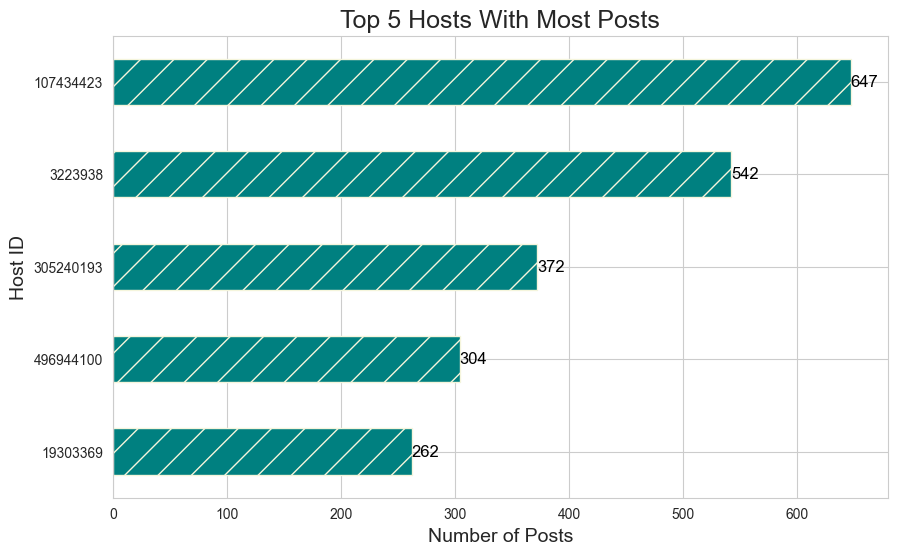

In [18]:
sns.set_style("whitegrid")
plt.figure(figsize=(10, 6))
ax = plt.axes()
airbnb["host_id"].value_counts().head().sort_values().plot(kind="barh",
                                                           color="teal",
                                                           hatch="/",
                                                           edgecolor="beige")
ax.bar_label(ax.containers[0], fmt='%.0f', color="black", fontsize=12)
plt.xlabel("Number of Posts", size=14)
plt.ylabel("Host ID", size=14)
plt.title("Top 5 Hosts With Most Posts", size=18)

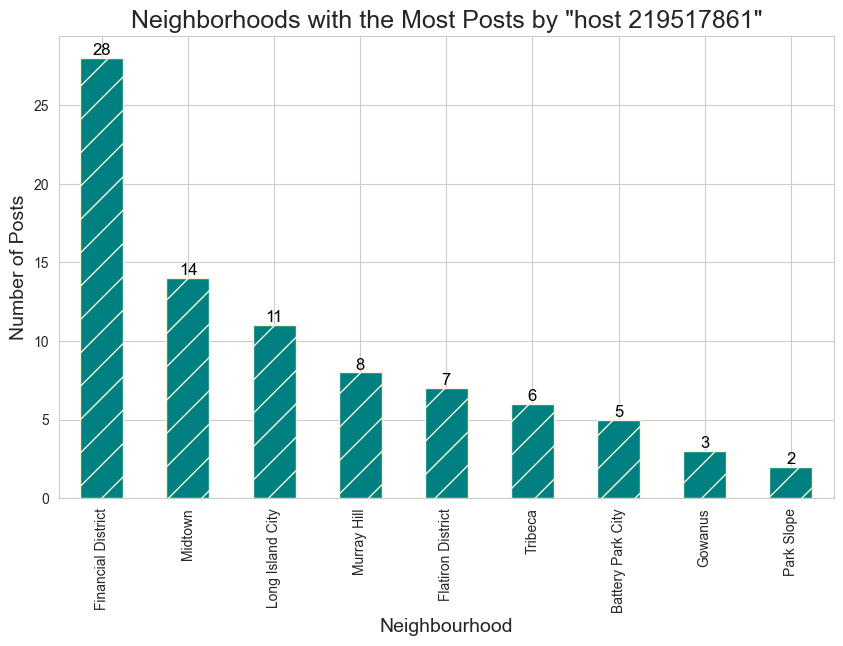

In [19]:
sns.set_style("whitegrid")
plt.figure(figsize=(10, 6))
ax = plt.axes()
airbnb.loc[airbnb['host_id'] == 219517861]["neighbourhood"].value_counts().plot(kind="bar", color="teal", hatch="/",
                                                                                edgecolor="beige")
ax.bar_label(ax.containers[0], fmt='%.0f', color="black", fontsize=12)
plt.xlabel("Neighbourhood", size=14)
plt.ylabel("Number of Posts", size=14)
plt.title('Neighborhoods with the Most Posts by "host 219517861"', size=18)
plt.show()

Text(0.5, 1.0, 'Neighbourhood Groups')

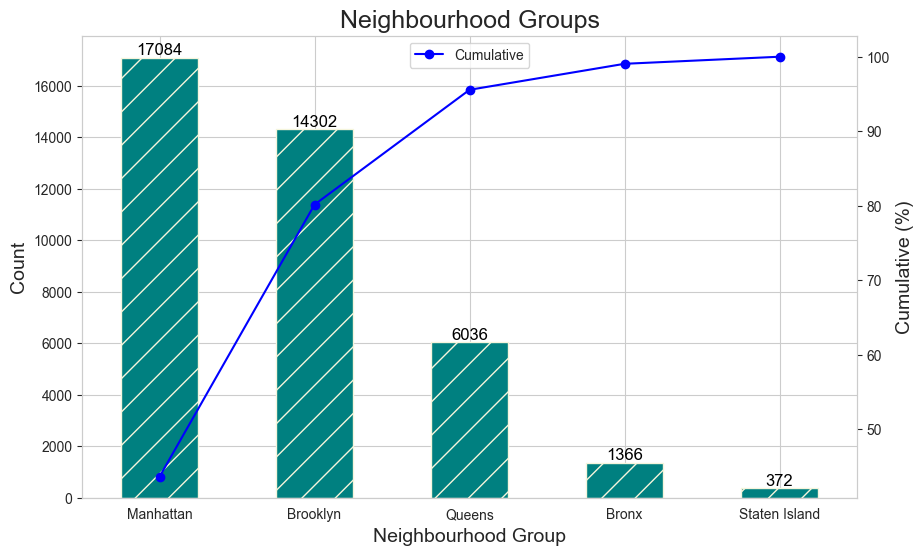

In [20]:
cumulative = round(airbnb["neighbourhood_group"].value_counts(normalize=True).cumsum() * 100, 2)
sns.set_style("whitegrid")
plt.figure(figsize=(10, 6))
ax1 = airbnb["neighbourhood_group"].value_counts().sort_values(ascending=False).plot(kind="bar", color="teal",
                                                                                     hatch="/", edgecolor="beige")

ax1.bar_label(ax1.containers[0], fmt='%.0f', color="black", fontsize=12)

ax2 = cumulative.plot(kind="line", color="blue", secondary_y=True, marker="o")
ax1.set_xlabel("Neighbourhood Group", size=14)
ax1.set_ylabel("Count", size=14)
ax2.set_ylabel("Cumulative (%)", size=14)
ax2.legend(["Cumulative"], loc=9)
plt.title("Neighbourhood Groups", size=18)

In [21]:
airbnb = airbnb.loc[airbnb['price'] > 0]
airbnb['price'].min()

10

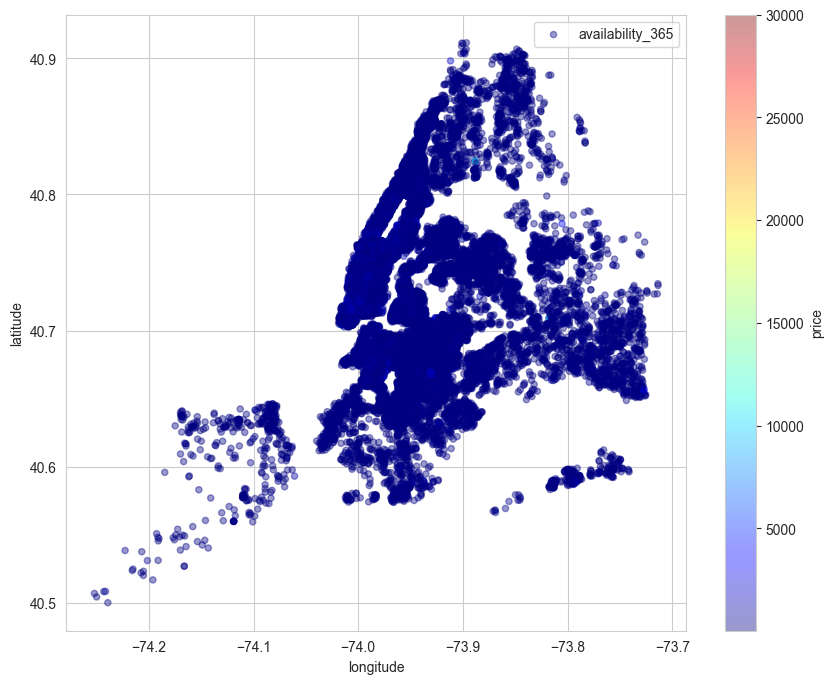

In [22]:
airbnb_geo = airbnb.plot(kind='scatter', x='longitude', y='latitude', label='availability_365', c='price',
                         cmap=plt.get_cmap('jet'), colorbar=True, alpha=0.4, figsize=(10, 8))
airbnb_geo.legend()

In [23]:
#Brooklyn
sub_1 = airbnb.loc[airbnb['neighbourhood_group'] == 'Brooklyn']
price_sub1 = sub_1[['price']]
#Manhattan
sub_2 = airbnb.loc[airbnb['neighbourhood_group'] == 'Manhattan']
price_sub2 = sub_2[['price']]
#Queens
sub_3 = airbnb.loc[airbnb['neighbourhood_group'] == 'Queens']
price_sub3 = sub_3[['price']]
#Staten Island
sub_4 = airbnb.loc[airbnb['neighbourhood_group'] == 'Staten Island']
price_sub4 = sub_4[['price']]
#Bronx
sub_5 = airbnb.loc[airbnb['neighbourhood_group'] == 'Bronx']
price_sub5 = sub_5[['price']]

price_list_by_n = [price_sub1, price_sub2, price_sub3, price_sub4, price_sub5]

In [24]:
data1 = []

city_list = ['Brooklyn', 'Manhattan', 'Queens', 'Staten Island', 'Bronx']

for x in price_list_by_n:
    i = x.describe(percentiles=[.25, .50, .75])
    i = i.iloc[3:]
    i.reset_index(inplace=True)
    i.rename(columns={'index': 'Stats'}, inplace=True)
    data1.append(i)

data1[0].rename(columns={'price': city_list[0]}, inplace=True)
data1[1].rename(columns={'price': city_list[1]}, inplace=True)
data1[2].rename(columns={'price': city_list[2]}, inplace=True)
data1[3].rename(columns={'price': city_list[3]}, inplace=True)
data1[4].rename(columns={'price': city_list[4]}, inplace=True)

stat_df = data1
stat_df = [df.set_index('Stats') for df in stat_df]
stat_df = stat_df[0].join(stat_df[1:])
stat_df

,Brooklyn,Manhattan,Queens,Staten Island,Bronx
Stats,,,,,
min,10.0,10.0,10.0,33.0,10.0
25%,65.0,108.0,55.0,70.0,60.0
50%,110.0,175.0,90.0,99.0,90.0
75%,185.0,290.0,147.0,142.0,141.0
max,7500.0,30000.0,10000.0,1200.0,9994.0


In [25]:
sub_6 = airbnb[airbnb.price < 500]

Text(0.5, 1.0, 'Density and distribution of prices for each neighberhood_group')

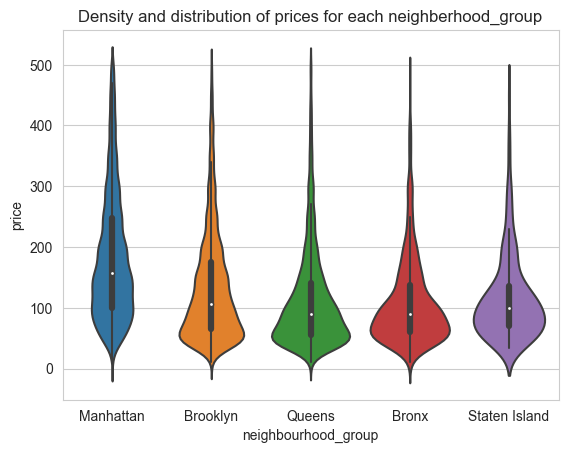

In [26]:
data2 = sns.violinplot(data=sub_6, x='neighbourhood_group', y='price')
data2.set_title('Density and distribution of prices for each neighberhood_group')

In [27]:
airbnb.neighbourhood.value_counts().head(10)

neighbourhood
Bedford-Stuyvesant    2723
Williamsburg          2296
Midtown               2076
Harlem                1841
Bushwick              1641
Hell's Kitchen        1599
Upper East Side       1533
Upper West Side       1517
Crown Heights         1235
East Village          1070
Name: count, dtype: int64

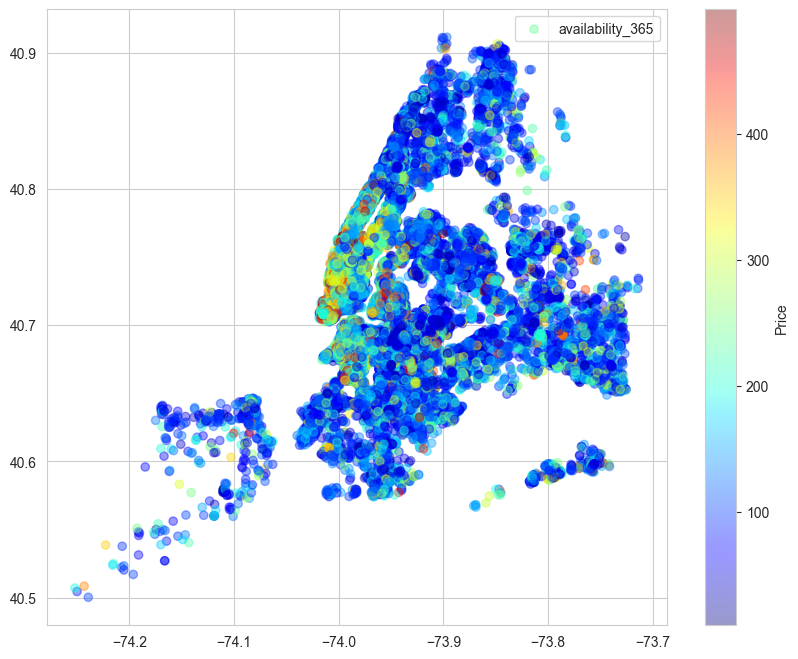

In [28]:
gdf = gpd.GeoDataFrame(sub_6, geometry=gpd.points_from_xy(sub_6.longitude, sub_6.latitude))

fig, ax = plt.subplots(figsize=(10, 8))
scatter = ax.scatter(gdf.geometry.x, gdf.geometry.y, c=gdf['price'], cmap='jet', alpha=0.4)

plt.colorbar(scatter, ax=ax, label='Price')

ax.legend(['availability_365'])
plt.show()

Text(0.5, 1.0, 'Price Distribution After Log Transformation')

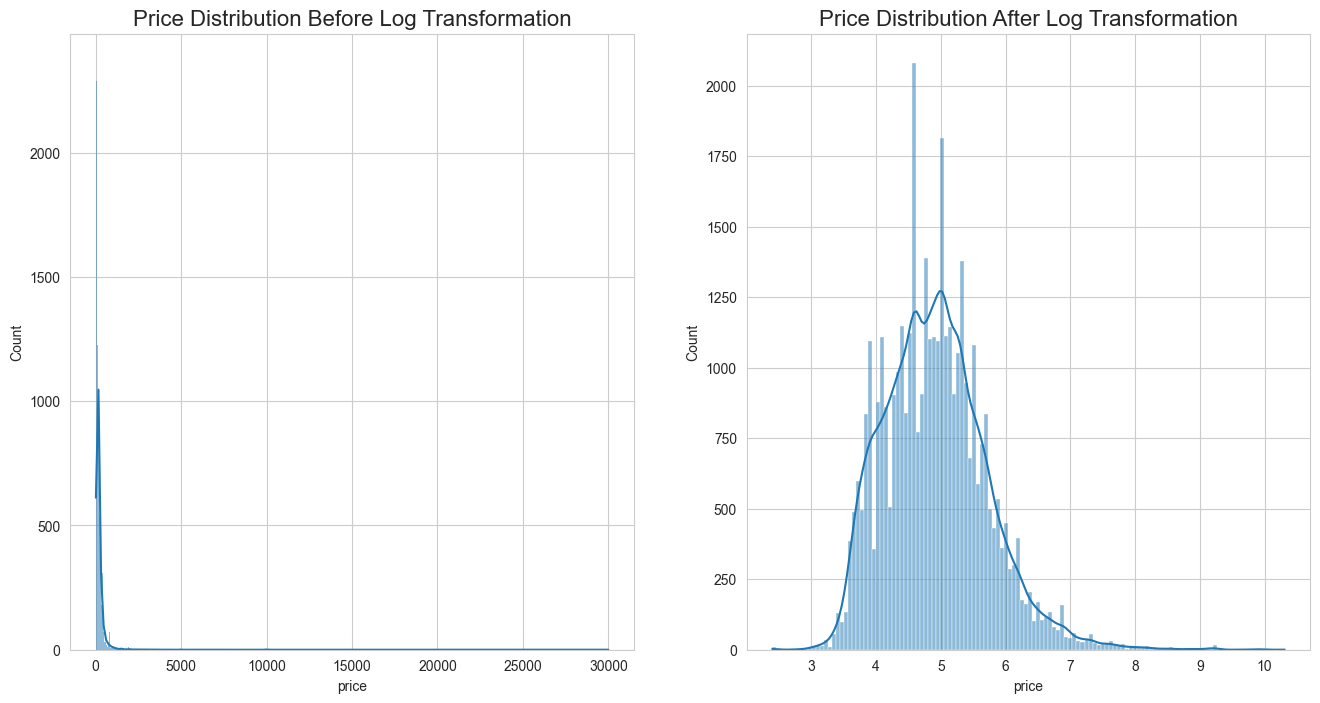

In [29]:
fig, ax = plt.subplots(1, 2, figsize=(16, 8))
sns.histplot(data=airbnb, x="price", kde=True, ax=ax[0]).set_title("Price Distribution Before Log Transformation",
                                                                   size=16)
sns.histplot(np.log1p(airbnb.price), kde=True, ax=ax[1]).set_title("Price Distribution After Log Transformation",
                                                                   size=16)

In [30]:
geojs = gpd.read_file('neighborhood.geojson')

In [31]:
df = airbnb[['latitude','longitude','price']]

In [32]:
df['coords'] = list(zip(df.longitude, df.latitude))
df['coords'] = df['coords'].apply(Point)

In [ ]:
from matplotlib.colors import Normalize
from matplotlib.colorbar import ColorbarBase
from matplotlib.cm import ScalarMappable, viridis

gdf = gpd.GeoDataFrame(df, geometry='coords')

base = geojs.plot(color='white', edgecolor='black', linewidth=1, figsize=(10, 10))

norm = Normalize(vmin=gdf['price'].min(), vmax=gdf['price'].max())

price_plot = gdf.plot(ax=base, marker='o', column='price', markersize=1, cmap='viridis', legend=False, norm=norm)

sm = ScalarMappable(norm=norm, cmap='viridis')
sm._A = []
cbar = plt.colorbar(sm, ax=base, fraction=0.03, pad=0.04)
cbar.set_label('Price Range')

plt.xlabel('Longitude')
plt.ylabel('Latitude')
plt.title('NYC Airbnb Data Price Range (Up to $10,000)')

plt.savefig('Price_map.svg', bbox_inches='tight')

In [ ]:
gdf = gpd.GeoDataFrame(df, geometry='coords')

base = geojs.plot(color='white', edgecolor='black', linewidth=1, figsize=(10, 10))

norm = Normalize(vmin=gdf['price'].min(), vmax=2000)

price_plot = gdf.plot(ax=base, marker='o', column='price', markersize=1, cmap='viridis', legend=False, norm=norm)

sm = ScalarMappable(norm=norm, cmap='viridis')
sm._A = []
cbar = plt.colorbar(sm, ax=base, fraction=0.03, pad=0.04)
cbar.set_label('Price Range')

plt.xlabel('Longitude')
plt.ylabel('Latitude')
plt.title('NYC Airbnb Data Price Range (Up to $2,000)')

plt.savefig('Price_map.svg', bbox_inches='tight')